# Final Exam

## Question 1 
Define a function `insert_block` to insert a block of values in a matrix,

```julia
A = fill(0, 9, 9)
insert_block(A, 3, 5, 2)
```

so that the above code would yield:

`9×9 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0`

In [167]:
function insert_block(Matrix,row,col,val)
    for i in 0:2
        for j in 0:2
            Matrix[row+i,col+j] = val
        end
    end
end

insert_block (generic function with 1 method)

In [168]:
Array = zeros(Int64,9,9)

9×9 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0

In [169]:
insert_block(Array,3,5,2)
Array

9×9 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0

## Question 2

### Create a Caesar ciphers

A caesar cipher is an encryption scheme that shifts all letters in the alphabet by some specified offset to other letters in the alphabet.

For example, a shift of 1 would turn the letter "A" into the letter "B" and the letter "M" to the letter "N".

### Goal

We want to add a method to the `+` operator such that we can add together a string and an integer shift to encrypt a message. For example,

```julia
4 + "hello" == "lipps"
```

### Test it out

Once you think you have it working, try to decrypt the following string by adding a shift of -7.
```julia
"Kv'uv{'tlkksl'pu'{ol'hmmhpyz'vm'kyhnvuz'mvy'\u80v|'hyl'jy|ujo\u80'huk'{hz{l'nvvk'~p{o'rl{jo|w5"
```

## Below is the step by step guide to solve the Caesar ciphers problem

### Step 1

First, we want a way to convert between characters and integers. Actually, under the hood, all of our characters are being represented as numbers via their *ASCII representation*.

You can start to get a feel for how this works by running the following lines of code.

```julia
convert(Int, 'a')
convert(Int, 'b')
convert(Char, 97)
convert(Char, 98)
```

In [170]:
convert(Int,' ')

32

What happens when you try to add an integer to a character? (Note that the difference between `Char`s and `String`s is important here!)

In [171]:
'a'+4

'e': ASCII/Unicode U+0065 (category Ll: Letter, lowercase)

When we treat a string elementwise, what is the type of (`typeof`) each element?

In [172]:
typeof('h')

Char

### Step 2
Try to write a function called `caesar(shift, stringin)` that encodes its input string, `stringin`, by shifting all letters in the alphabet by `shift`.

One way to do this is to use the `map` or `broadcast` function!

In [173]:
function ceasar(shift, stringin)
    temp = ""
    for i in stringin
        temp *= string(i+shift)
    end
    return temp
end

ceasar (generic function with 1 method)

In [174]:
ceasar(0, "Hello world")

"Hello world"

In [175]:
testStr = "Kv'uv{'tlkksl'pu'{ol'hmmhpyz'vm'kyhnvuz'mvy'\u80v|'hyl'jy|ujo\u80'huk'{hz{l'nvvk'~p{o'rl{jo|w5"

"Kv'uv{'tlkksl'pu'{ol'hmmhpyz'vm'kyhnvuz'mvy'\u80v|'hyl'jy|ujo\u80'huk'{hz{l'nvvk'~p{o'rl{jo|w5"

In [176]:
ceasar(-7, testStr)

"Do not meddle in the affairs of dragons for you are crunchy and taste good with ketchup."

If you think you have this working, try out
```julia
caesar(-4, "lipps")
```

In [177]:
ceasar(-4, "lipps")

"hello"

### Step 3
We want to extend the `+` operator to include a way to apply this cipher.

The `+` operator lives in a place called "Base". Everything that lives in Base is accessible to us as users by default, but we need a special incantation to modify the things that live in Base. If we want to modify `+`, our incantation is

```julia
import Base: +
```
To perform string addition, write a method for `+` like this

+(x::String, y::String) = string(x, y)

In [178]:
import Base: +
+(x::String, y::String) = string(x, y)

+ (generic function with 270 methods)

And now that you've extended `+` once, let's add another method for `+` that calls the `caesar` function we've written.

In [179]:
+(x::String, y::Int) = ceasar(y,x)

+ (generic function with 271 methods)

Test your final answer.

In [180]:
"hello"+4

"lipps"

## Question 3

Download the `test.csv` file from moddle. This data has passenger details of train travellers. Read the data and tidy it (handle the missing values). Calculate the average age for Male passengers and Female passengers.

In [2]:
using CSV, DataFrames, Statistics
DF=CSV.read("test.csv",DataFrame,missingstring="")
DF_clean = dropmissing(DF, :Age)

Row,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,String,String7,Float64,Int64,Int64,String31,Float64?,String15?,String1
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,missing,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,missing,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,missing,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,missing,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,missing,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.225,missing,S
7,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,missing,Q
8,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0,missing,S
9,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,missing,C


In [182]:
# Mean Age of Male
mean(DF_clean[in.(DF_clean.Sex, Ref(["male"])), :].Age)

30.27273170731707

In [183]:
# Mean Age of Female
mean(DF_clean[in.(DF_clean.Sex, Ref(["female"])), :].Age)

30.27236220472441

## Question 4   

Download the file RestaurantData.zip file containing the data for this project assignment from the Moodle. Unzip the file in a directory that will serve as your working directory. When you start up Julia, make sure to change your working directory to the directory where you unzipped the data. 

The data for this project came from Kaggle where somebody had used the Zomato API to scrape the data. Zomato API Analysis is useful for foodies who want to taste the best cuisines of every part of the world which lies in their budget. 

For more information on Zomato API and Zomato API key you could visit https://developers.zomato.com/api#headline1 and https://developers.zomato.com/documentation
Data Fetching: Data had been originally collected from the Zomato API in the form of .json files (raw data). The collected data has been stored in the Comma Separated Value file zomato.csv. 

Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables: <br>
•	Restaurant Id: Unique id of every restaurant across various cities of the world <br>
•	Restaurant Name: Name of the restaurant <br>
•	Country Code: Country in which restaurant is located <br> 
•	City: City in which restaurant is located <br>
•	Address: Address of the restaurant <br>
•	Locality: Location in the city <br>
•	Locality Verbose: Detailed description of the locality <br>
•	Longitude: Longitude coordinate of the restaurant's location <br>
•	Latitude: Latitude coordinate of the restaurant's location <br>
•	Cuisines: Cuisines offered by the restaurant <br>
•	Average Cost for two: Cost for two people in different currencies 👫 <br>
•	Currency: Currency of the country <br>
•	Has Table booking: yes/no <br>
•	Has Online delivery: yes/ no <br>
•	Is delivering: yes/ no <br>
•	Switch to order menu: yes/no <br>
•	Price range: range of price of food <br>
•	Aggregate Rating: Average rating out of 5 <br>
•	Rating color: depending upon the average rating color <br>
•	Rating text: text on the basis of rating of rating <br>
•	Votes: Number of ratings casted by people

### 4.1 Plot the user rankings for the restaurants 

Read the zomato data into Julia via the `CSV.read` function and look at the first few rows.
There are many columns in this dataset. You can see how many by typing `ncol(zomato)` (you can see the number of rows with the `nrow` function). In addition, you can see the names of each column by typing `names(zomato)` (the names are also listed on the previous page.) 
Make a simple histogram of the ratings (column 18 in the zomato dataset).

In [184]:
zomato=CSV.read("zomato.csv",DataFrame,missingstring="");

In [185]:
first(zomato,5)

Row,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
,Int64,String,Int64,String31,String,String,String,Float64,Float64,String?,Int64,String31,String3,String3,String3,String3,Int64,Float64,String15,String15,Int64
1,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Makati City",121.028,14.5654,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
2,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Makati City",121.014,14.5537,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
3,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City",121.057,14.5814,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
4,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.056,14.5853,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
5,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.058,14.5845,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [186]:
last(zomato,5)

Row,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
,Int64,String,Int64,String31,String,String,String,Float64,Float64,String?,Int64,String31,String3,String3,String3,String3,Int64,Float64,String15,String15,Int64
1,5915730,Naml۱ Gurme,208,\xdb\xc1stanbul,"Kemanke\x81\xf4 Karamustafa Pa\x81\xf4a Mahallesi, R۱ht۱m Caddesi, No 1/1, Katl۱ Otopark Alt۱, Beyo\xdb\xf4lu, \xdb\xc1stanbul",Karak\xed_y,"Karak\xed_y, \xdb\xc1stanbul",28.9774,41.0228,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
2,5908749,Ceviz A\xdb\xf4ac۱,208,\xdb\xc1stanbul,"Ko\x81\xf4uyolu Mahallesi, Muhittin \xed\xecst\xed_nda\xdb\xf4 Caddesi, No 85, Kad۱k\xed_y, \xdb\xc1stanbul",Ko\x81\xf4uyolu,"Ko\x81\xf4uyolu, \xdb\xc1stanbul",29.0413,41.0098,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
3,5915807,Huqqa,208,\xdb\xc1stanbul,"Kuru\xed_e\x81\xf4me Mahallesi, Muallim Naci Caddesi, No 56, Be\x81\xf4ikta\x81\xf4, \xdb\xc1stanbul",Kuru\xed_e\x81\xf4me,"Kuru\xed_e\x81\xf4me, \xdb\xc1stanbul",29.0346,41.0558,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
4,5916112,A\x81\xf4\x81\xf4k Kahve,208,\xdb\xc1stanbul,"Kuru\xed_e\x81\xf4me Mahallesi, Muallim Naci Caddesi, No 64/B, Be\x81\xf4ikta\x81\xf4, \xdb\xc1stanbul",Kuru\xed_e\x81\xf4me,"Kuru\xed_e\x81\xf4me, \xdb\xc1stanbul",29.036,41.058,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
5,5927402,Walter's Coffee Roastery,208,\xdb\xc1stanbul,"Cafea\xdb\xf4a Mahallesi, Bademalt۱ Sokak, No 21/B, Kad۱k\xed_y, \xdb\xc1stanbul",Moda,"Moda, \xdb\xc1stanbul",29.026,40.9848,Cafe,55,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [187]:
ncol(zomato)

21

In [188]:
nrow(zomato)

9551

In [189]:
names(zomato)

21-element Vector{String}:
 "Restaurant ID"
 "Restaurant Name"
 "Country Code"
 "City"
 "Address"
 "Locality"
 "Locality Verbose"
 "Longitude"
 "Latitude"
 "Cuisines"
 "Average Cost for two"
 "Currency"
 "Has Table booking"
 "Has Online delivery"
 "Is delivering now"
 "Switch to order menu"
 "Price range"
 "Aggregate rating"
 "Rating color"
 "Rating text"
 "Votes"

In [190]:
describe(zomato)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Restaurant ID,9.05113e6,53,6.00409e6,18500652,0,Int64
2,Restaurant Name,,Let's Burrrp,,\xed\x88ukura\xdb\xf4a Sofras۱,0,String
3,Country Code,18.3656,1,1.0,216,0,Int64
4,City,,Abu Dhabi,,\xdb\xc1stanbul,0,String31
5,Address,,"1 & 2, Block A-5 B, DDA Market, Paschim Vihar, New Delhi",,"\xed\xecmitk\xed_y Mahallesi, 2432. Cadde (8. Cadde), No 113, \xed\x88ankaya, Ankara",0,String
6,Locality,,"ILD Trade Centre Mall, Sohna Road",,\xed\xecmitk\xed_y,0,String
7,Locality Verbose,,"ILD Trade Centre Mall, Sohna Road, Gurgaon",,"\xed\xecmitk\xed_y, Ankara",0,String
8,Longitude,64.1266,-157.948,77.192,174.832,0,Float64
9,Latitude,25.8544,-41.3304,28.5705,55.977,0,Float64


In [192]:
zomato = dropmissing(zomato, :"Aggregate rating");

In [194]:
zomato[!,"Aggregate rating"];

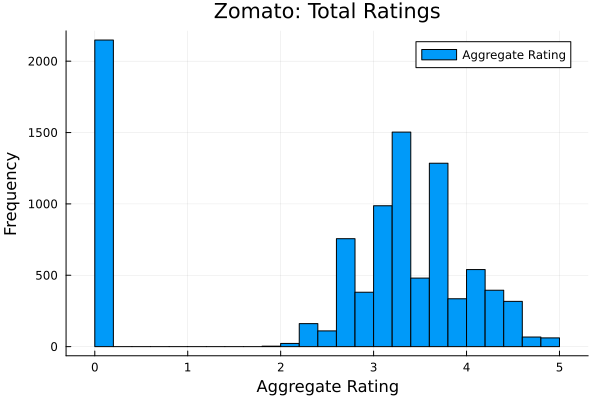

In [98]:
using Plots
histogram(zomato[!,18], label="Aggregate Rating")  
xlabel!("Aggregate Rating")
ylabel!("Frequency")
title!("Zomato: Total Ratings")

### 4.2 Finding the 3 best restaurants in a country by price range 

Write a function called best that takes two arguments: a 3-character country code of a country and a price range (numbers 1,2,3,4). The function should read the zomato.csv file and return a data frame with the names of the restaurant and the city that have the 3 best (i.e. highest) ranking for a price range in that country. There are 4 price range levels. Countries that do not have data on a particular price range should be excluded from the set of restaurants when deciding the rankings. 
Handling ties. If there is a tie for the best restaurant for a given price range, then the restaurant names should be sorted in alphabetical order.
The function should use the following template. 

```julia
Function best(country, pricerange)
        ## Read zomato data
        ## Check that country and price range are valid
        ## Return restaurant name in that state with highest ranking
end
```

The function should check the validity of its arguments. If an invalid country value is passed to best, the function should throw an error via the stop function with the exact message “invalid country”. If an invalid price range value is passed to best, the function should throw an error via the stop function with the exact message “invalid price range”. 
Here is some sample output from the function (WARNING: we will run different tests and the results shown here might not actually be correct)

```julia
julia> best("USA", 1)
3 rows × 2 columns

  Restaurant Name       City                  
  String                  String                 
1 Oakwood Cafe            Dalton                
2 Rae's Coastal Cafe      Augusta               
3 Shorts Burger and Shine Cedar Rapids/Iowa City

julia> best("IND", 3)
3 rows × 2 columns
  Restaurant Name         City   
  String                  String                 
1 AB's - Absolute Barbecues Chennai
2 Sagar Gaire Fast Food     Bhopal 
3 Sheroes Hangout           Agra

julia> best("TGH", 4)
Error in best("TGH", 4): invalid country

julia> best("BRA", 5)
Error in best("BRA", 5) : invalid price range
```

In [10]:
function best(country::String, pricerange::Int)
    if pricerange > 4 || pricerange < 1
        return println("Error in best(","\"",country,"\"",", ",pricerange,"): invalid price range")
    end
    # Read in the country codes and create a dataframe called "CCodes"
    CCodes=CSV.read("Country-Code.csv",DataFrame,missingstring="")
    
    if size(CCodes[in.(CCodes."3lettercode", Ref([country])), :],1) == 0
        return println("Error in best(","\"",country,"\"",", ",pricerange,"): invalid country")
    end

    # Read in the data file and create a dataframe called "zomato"
    zomato=CSV.read("zomato.csv",DataFrame,missingstring="")

    # Using an outer join on the "Country Codes" to bring in the 3 letter code 
    zomato = outerjoin(zomato, CCodes, on = :"Country Code")

    # Drops any rows that have missing values in "Aggregate rating"
    zomato = dropmissing(zomato, :"Aggregate rating")

    #Takes a subset of the the previous subset using the price range
    zomato = zomato[in.(zomato."Price range", Ref([pricerange])), :]

    # Takes the subset of "zomato" using the country code
    zomato = zomato[in.(zomato."3lettercode", Ref([country])), :]

    # Checks if there are any price ranges in the country and returns
    # an error statment if there aren't any
    if size(zomato,1) == 0
        return println("Error in best(","\"",country,"\"",", ",pricerange,"): invalid country")
    end

    # Creating a new dataframe "Top3" which holds all data of the
    # subset and sorting the data first one "Aggregate rating" and
    # then by "Restaurant Name" alphabetically
    Top3 = sort(zomato, [:"Aggregate rating",:"Restaurant Name"], rev=[true, false])
    # Printing out the first 3 entries fromt the "Top3" dataframe
    Top3[1:3,[:"Restaurant Name",:"City"]]
end

best (generic function with 2 methods)

In [11]:
function best(country::Int, pricerange::Int)
    if pricerange > 4 || pricerange < 1
        return println("Error in best(","\"",country,"\"",", ",pricerange,"): invalid price range")
    end
    # Read in the country codes and create a dataframe called "CCodes"
    CCodes=CSV.read("Country-Code.csv",DataFrame,missingstring="")
    
    if size(CCodes[in.(CCodes."Country Code", Ref([country])), :],1) == 0
        return println("Error in best(","\"",country,"\"",", ",pricerange,"): invalid country")
    end

    # Read in the data file and create a dataframe called "zomato"
    zomato=CSV.read("zomato.csv",DataFrame,missingstring="")

    # Using an outer join on the "Country Codes" to bring in the 3 letter code 
    zomato = outerjoin(zomato, CCodes, on = :"Country Code")

    # Drops any rows that have missing values in "Aggregate rating"
    zomato = dropmissing(zomato, :"Aggregate rating")

    #Takes a subset of the the previous subset using the price range
    zomato = zomato[in.(zomato."Price range", Ref([pricerange])), :]

    # Takes the subset of "zomato" using the country code
    zomato = zomato[in.(zomato."Country Code", Ref([country])), :]

    # Checks if there are any price ranges in the country and returns
    # an error statment if there aren't any
    if size(zomato,1) == 0
        return println("Error in best(","\"",country,"\"",", ",pricerange,"): invalid country")
    end

    # Creating a new dataframe "Top3" which holds all data of the
    # subset and sorting the data first one "Aggregate rating" and
    # then by "Restaurant Name" alphabetically
    Top3 = sort(zomato, [:"Aggregate rating",:"Restaurant Name"], rev=[true, false])
    # Printing out the first 3 entries fromt the "Top3" dataframe
    Top3[1:3,[:"Restaurant Name",:"City"]]
end

best (generic function with 2 methods)

In [12]:
# Showcasing the method that recognizes an Int in the country code field
best(216,1)

Row,Restaurant Name,City
,String?,String31?
1,Ingleside Village Pizza,Macon
2,Marukame Udon,Rest of Hawaii
3,Mazzaro's Italian Market,Tampa Bay


In [15]:
# Showcasing the method that recognizes a String in the country code field
best("USA",1)

Row,Restaurant Name,City
,String?,String31?
1,Ingleside Village Pizza,Macon
2,Marukame Udon,Rest of Hawaii
3,Mazzaro's Italian Market,Tampa Bay
